In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [2]:
filename='/Users/xavob/Documents/chopinSeg.wav'
y, sr = librosa.load(filename)

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

log_S = librosa.power_to_db(S, ref=np.max)

mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

y_harmonic, y_percussive = librosa.effects.hpss(y)

C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

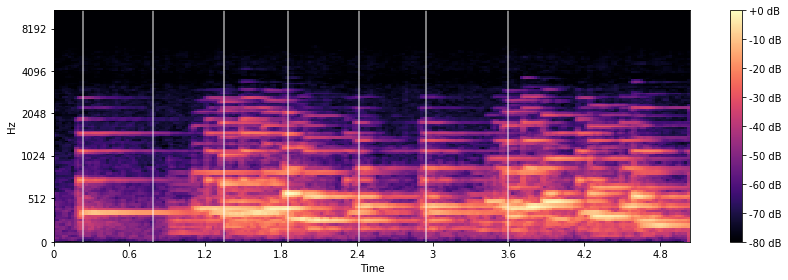

In [3]:
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)
plt.axis('tight')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [4]:
print('Estimated tempo: %.2f BPM' % tempo)
print('First 5 beat frames:', beats[:5])
print('First 5 beat times:', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo: 103.36 BPM
First 5 beat frames: [ 10  34  58  80 104]
First 5 beat times: [0.23219955 0.78947846 1.34675737 1.85759637 2.41487528]


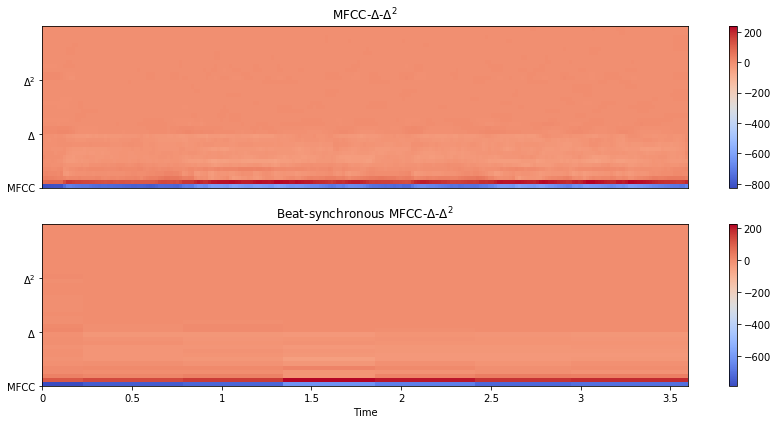

In [5]:
M_sync = librosa.util.sync(M, beats)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
librosa.display.specshow(M)
plt.title('MFCC-$\Delta$-$\Delta^2$')
plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])
plt.colorbar()
plt.subplot(2,1,2)

librosa.display.specshow(M_sync, x_axis='time',
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))

plt.yticks(np.arange(0, M_sync.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])             
plt.title('Beat-synchronous MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

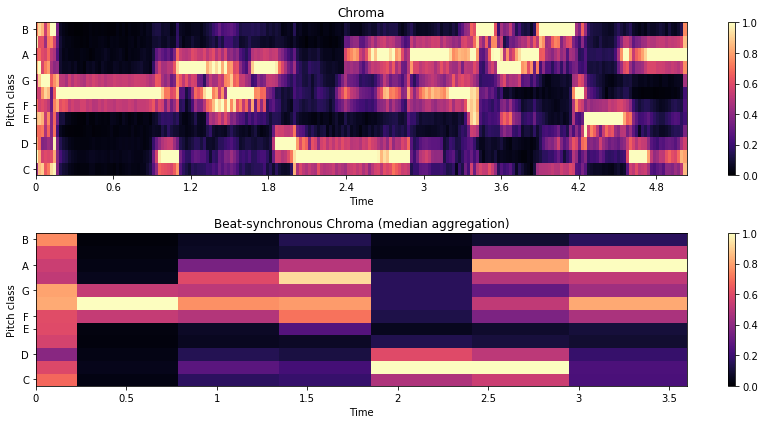

In [6]:
C_sync = librosa.util.sync(C, beats, aggregate=np.median)

plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Chroma')
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


plt.title('Beat-synchronous Chroma (median aggregation)')
plt.colorbar()
plt.tight_layout()